# UPSAMPLING QUASARS
We want to produce new data of the redshifts of quasars following the distribution measured by the SDSS. We plot know the distribution we would like to reproduce:

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from tqdm import tqdm
from astroML.datasets import fetch_dr7_quasar

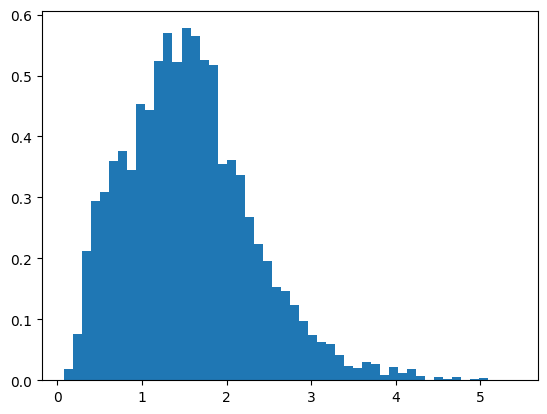

In [2]:
data = fetch_dr7_quasar()[0:10000]
red = data['redshift']

info_hist = plt.hist(red, bins=50, density=True)
bars = info_hist[0]
xbins = info_hist[1]

We are going to implement two strategies to do this.

## Rejection method
We now implemet the Rejection method to extract data following the distribution of the redshifts of the quasars.

In [3]:
N_upsample = 100000

distrUx = stats.uniform(np.min(xbins), np.max(xbins) - np.min(xbins))
distrUy = stats.uniform(0, np.max(bars))

upsample_r = np.zeros(N_upsample)

for i in tqdm(range (0, N_upsample)):
    flag = True
    #Draw numbers until the pair is accepted as a new sample
    while flag:
        x = distrUx.rvs()
        y = distrUy.rvs()
        for j in range(0, len(bars)):
            if ((x >= xbins[j] and x <= xbins[j+1]) and y <= bars[j]):
                upsample_r[i] = x
                flag = False
                break

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10110.29it/s]


And now we plot the new data over the old ones to see the correspondence:

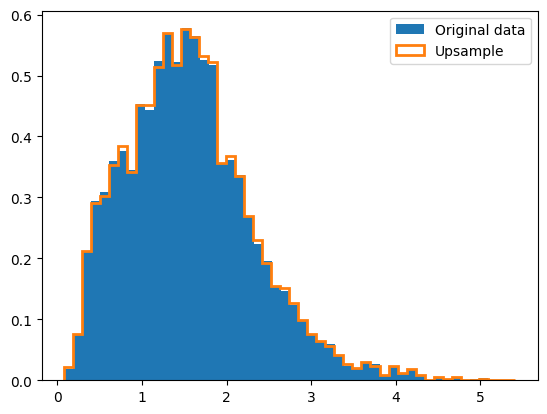

In [4]:
plt.hist(red, bins = 50, density=True, label='Original data')
style={'linewidth':2}
plt.hist(upsample_r, bins=50, density=True, histtype='step', label='Upsample', **style)
plt.legend()

We can see, at least qualitatively, the correspondence among the data we had before and the data produced.
## Inverse method
We instead implement now the Inverse method to upsample the distribution

In [5]:
cdf = stats.ecdf(red).cdf

xx = stats.uniform.rvs(0, 1, 100000)
upsample_i = [opt.brentq(lambda s: (cdf.evaluate(s)-e), np.min(xbins) - 0.0001, np.max(xbins)) for e in tqdm(xx)]

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [00:40<00:00, 2488.63it/s]


And now we plot the new data over the old ones to see the correspondence:

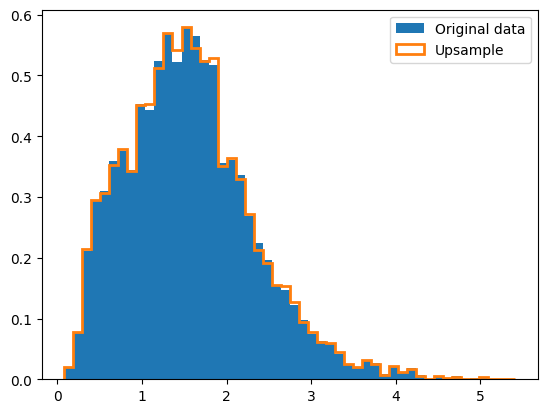

In [6]:
plt.hist(red, bins = 50, density=True, label='Original data')
style={'linewidth':2}
plt.hist(upsample_i, bins=50, density=True, histtype='step', label='Upsample', **style)
plt.legend()

We can see, at least qualitatively, the correspondence among the data we had before and the data produced.